# Machine Learning technique on PET block detector development - Part 2-4

## Crystal/Pixel discrimination for DQS PET block detector using Machine Learning techniques (v1.0, 2019-09)   
## (Continued from Part 2-3)
---


###  
### 8. Scintillator/Pixel discrimination using ML algorithms - Part IV, using Neuro Network algorithm
***

In [12]:
# load libraries

import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
# %matplotlib qt
%matplotlib inline
# %matplotlib notebook

import pickle
from sklearn.externals import joblib
from sklearn import metrics
import time

plt.rcParams['figure.dpi'] = 120 # default is 72

In [13]:
# re-load data

file = "D:\\ML on PET block\\new_concept_block_lso\\new_concept_block_15x15\\results\\ML_data\\new_concept_block_15x15_sorted_events1.csv"
df0 = pd.read_csv (file, comment='#')

X = df0.iloc[:,4:].values
decoding = df0.iloc[:,0:4].values


In [14]:
infile = open('./pickle/temp_data1','rb')
X_t, X_b, X_a, X_g, X_c, index_train, index_test = pickle.load(infile)
infile.close()


In [15]:
# pixel_xy = np.array(df0['index_y'] * 15 + df0['index_x'])
pixel_x = np.array(df0['index_x'])
pixel_y = np.array(df0['index_y'])
pixel_xy = pixel_y * 15 + pixel_x

pixel_x_train = pixel_x[index_train]
pixel_y_train = pixel_y[index_train]
pixel_xy_train = pixel_xy[index_train]

pixel_x_test = pixel_x[index_test]
pixel_y_test = pixel_y[index_test]
pixel_xy_test = pixel_xy[index_test]


####  
#### 8.1 pixel discrimination using ANN algorithm from sklearn MLP classifier

In [16]:
from sklearn.neural_network import MLPClassifier

X_train = X[index_train]
X_test = X[index_test]
y_train = pixel_xy[index_train]
y_test = pixel_xy[index_test]

In [78]:

train_length = 20000
test_length = 1000

t0 = time.time()
mlp = MLPClassifier(hidden_layer_sizes=(36,30), activation='logistic', max_iter=50, warm_start=True, verbose=True)
mlp.fit(X_train[:train_length],y_train[:train_length])
y_pred = mlp.predict(X_test[:test_length])
accu= sum(y_test[:test_length]==y_pred) / test_length
t1 = time.time()
print(accu, t1-t0)


Iteration 1, loss = 5.39806428
Iteration 2, loss = 5.27865488
Iteration 3, loss = 4.97004941
Iteration 4, loss = 4.60513156
Iteration 5, loss = 4.28707826
Iteration 6, loss = 4.02161169
Iteration 7, loss = 3.79116923
Iteration 8, loss = 3.58412266
Iteration 9, loss = 3.40035428
Iteration 10, loss = 3.23616909
Iteration 11, loss = 3.09086623
Iteration 12, loss = 2.96147892
Iteration 13, loss = 2.84439253
Iteration 14, loss = 2.73884575
Iteration 15, loss = 2.64435978
Iteration 16, loss = 2.55739088
Iteration 17, loss = 2.47747422
Iteration 18, loss = 2.40257637
Iteration 19, loss = 2.33235250
Iteration 20, loss = 2.26793813
Iteration 21, loss = 2.20669978
Iteration 22, loss = 2.15049892
Iteration 23, loss = 2.09768510
Iteration 24, loss = 2.04888761
Iteration 25, loss = 2.00375291
Iteration 26, loss = 1.96221178
Iteration 27, loss = 1.92107573
Iteration 28, loss = 1.88377336
Iteration 29, loss = 1.84746939
Iteration 30, loss = 1.81265184
Iteration 31, loss = 1.78193344
Iteration 32, los

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


##### 8.1.1 compare the activation functions and iterations

In [117]:
accuracy = []
activation = ['identity', 'logistic', 'tanh', 'relu']

train_length = 20000
test_length = 1000

mlps = []
for act in activation:
    mlp = MLPClassifier(hidden_layer_sizes=(24,30), activation=act, max_iter=1, warm_start=True)
    mlps.append(mlp)

In [118]:
loss = [[],[],[],[]]
accuracy = [[],[],[],[]]
iteration = [[],[],[],[]]

for index, act in enumerate(activation): 
    for iter in range(40):
        for i in range(10):
            mlps[index].fit(X_train[:train_length], y_train[:train_length])
        loss[index].append(mlps[index].loss_)
        iteration[index].append(mlps[index].n_iter_)
        
        y_pred = mlps[index].predict(X_test[:test_length])
        a = sum(y_test[:test_length]==y_pred) / test_length
        accuracy[index].append(a)

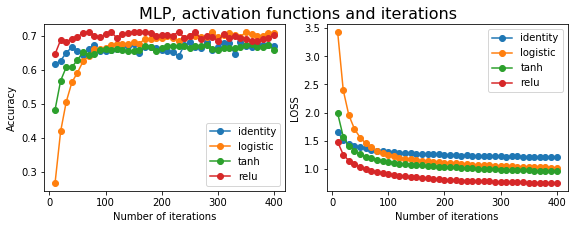

In [129]:
fig, ax = plt.subplots(1,2, figsize=(8,3))
fig.suptitle('MLP, activation functions and iterations', fontsize=16)
fig.tight_layout()
fig.subplots_adjust(top=0.9)

lines = []
for j in range(len(accuracy)):
    line, = ax[0].plot(iteration[j], accuracy[j], 'o-', label=activation[j])
    lines.append(line)
    
#ax[0].set_title("")
ax[0].set_xlabel("Number of iterations")
ax[0].set_ylabel("Accuracy")
ax[0].legend()


lines = []
for j in range(len(loss)):
    line, = ax[1].plot(iteration[j], loss[j], 'o-', label=activation[j])
    lines.append(line)
    
#ax[1].set_title("")
ax[1].set_xlabel("Number of iterations")
ax[1].set_ylabel("LOSS")
ax[1].legend()

plt.savefig(".\\figs2\\MLP_accu_vs_iteration1.png", dpi=300)


##### 8.1.2 compare the hidden layer node number ('relu' and 'logistic' only) using grid search

In [140]:
from sklearn.model_selection import GridSearchCV

train_length = 20000
test_length = 1000

parameters = {'activation':('logistic', 'relu'), 'hidden_layer_sizes':((18,30),(24,30),(30,30), (18,28),(24,28),(30,28))}
mlp = MLPClassifier(max_iter=200)
clf = GridSearchCV(mlp, parameters, n_jobs=-1, cv=5)

clf.fit(X_train[:train_length], y_train[:train_length])


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'activation': ('logistic', 'relu'), 'hidden_layer_sizes': ((18, 30), (24, 30), (30, 30), (18, 28), (24, 28), (30, 28))},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [141]:
clf.cv_results_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\util

{'mean_fit_time': array([102.1584702 ,  98.36205587, 104.84083319,  99.6859231 ,
         97.76597848,  99.37345157,  87.00778489,  81.87143407,
         86.03088822,  88.99717097,  94.59618611,  69.13071861]),
 'std_fit_time': array([ 0.6538248 ,  7.6650371 ,  0.5287279 ,  0.44717807,  7.2603844 ,
         7.30707587, 12.54637155, 19.65955311, 10.08080667, 10.70765811,
        10.23645759, 15.11921269]),
 'mean_score_time': array([0.05225348, 0.054741  , 0.05333114, 0.0503273 , 0.05511847,
        0.05596828, 0.04907022, 0.0487072 , 0.04950075, 0.04900808,
        0.04874964, 0.03437581]),
 'std_score_time': array([0.00321432, 0.00430929, 0.0038725 , 0.00088073, 0.00484105,
        0.00436606, 0.00327775, 0.00313215, 0.00342524, 0.00347262,
        0.00170821, 0.00624757]),
 'param_activation': masked_array(data=['logistic', 'logistic', 'logistic', 'logistic',
                    'logistic', 'logistic', 'relu', 'relu', 'relu', 'relu',
                    'relu', 'relu'],
             

In [145]:
clf.best_params_

{'activation': 'relu', 'hidden_layer_sizes': (30, 30)}

In [147]:
y_pred = clf.best_estimator_.predict(X_test[:test_length])
print('accuracy = %f' % (sum(y_test[:test_length]==y_pred) / test_length))


accuracy = 0.698000


In [148]:
from sklearn.model_selection import GridSearchCV

train_length = 20000
test_length = 1000

parameters = {'hidden_layer_sizes':((30,30),(40,30),(60,30), (30,40),(40,40),(60,40))}
mlp = MLPClassifier(max_iter=200)
clf = GridSearchCV(mlp, parameters, n_jobs=-1, cv=5)

clf.fit(X_train[:train_length], y_train[:train_length])


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'hidden_layer_sizes': ((30, 30), (40, 30), (60, 30), (30, 40), (40, 40), (60, 40))},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [153]:
clf.cv_results_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\util

{'mean_fit_time': array([ 95.26415172,  97.93745456, 104.18100877, 103.33856502,
        108.00257888,  89.10769224]),
 'std_fit_time': array([14.78132282, 13.96621989, 12.33600644,  5.97208427, 10.87426813,
         8.01892185]),
 'mean_score_time': array([0.05353107, 0.05233755, 0.05595126, 0.05436096, 0.05793548,
        0.03125482]),
 'std_score_time': array([7.26742435e-03, 3.22613714e-03, 4.34008301e-03, 4.41341115e-03,
        7.66894591e-03, 1.19113884e-06]),
 'param_hidden_layer_sizes': masked_array(data=[(30, 30), (40, 30), (60, 30), (30, 40), (40, 40),
                    (60, 40)],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'hidden_layer_sizes': (30, 30)},
  {'hidden_layer_sizes': (40, 30)},
  {'hidden_layer_sizes': (60, 30)},
  {'hidden_layer_sizes': (30, 40)},
  {'hidden_layer_sizes': (40, 40)},
  {'hidden_layer_sizes': (60, 40)}],
 'split0_test_score': array([0.6682163 , 0.66307805, 0.67

In [152]:
print(clf.best_params_)

{'mean_fit_time': array([ 95.26415172,  97.93745456, 104.18100877, 103.33856502,
       108.00257888,  89.10769224]), 'std_fit_time': array([14.78132282, 13.96621989, 12.33600644,  5.97208427, 10.87426813,
        8.01892185]), 'mean_score_time': array([0.05353107, 0.05233755, 0.05595126, 0.05436096, 0.05793548,
       0.03125482]), 'std_score_time': array([7.26742435e-03, 3.22613714e-03, 4.34008301e-03, 4.41341115e-03,
       7.66894591e-03, 1.19113884e-06]), 'param_hidden_layer_sizes': masked_array(data=[(30, 30), (40, 30), (60, 30), (30, 40), (40, 40),
                   (60, 40)],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'hidden_layer_sizes': (30, 30)}, {'hidden_layer_sizes': (40, 30)}, {'hidden_layer_sizes': (60, 30)}, {'hidden_layer_sizes': (30, 40)}, {'hidden_layer_sizes': (40, 40)}, {'hidden_layer_sizes': (60, 40)}], 'split0_test_score': array([0.6682163 , 0.66307805, 0.67237583, 0.66846097, 0.67

In [154]:
y_pred = clf.best_estimator_.predict(X_test[:test_length])
print('accuracy = %f' % (sum(y_test[:test_length]==y_pred) / test_length))


accuracy = 0.708000


In [155]:
from sklearn.model_selection import GridSearchCV

train_length = 20000
test_length = 1000

parameters = {'hidden_layer_sizes':((60,30),(90,30),(120,30),(150,30))}
mlp = MLPClassifier(max_iter=200)
clf = GridSearchCV(mlp, parameters, n_jobs=-1, cv=5)

clf.fit(X_train[:train_length], y_train[:train_length])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'hidden_layer_sizes': ((60, 30), (90, 30), (120, 30), (150, 30))},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [157]:
print(clf.best_params_)

{'hidden_layer_sizes': (120, 30)}


In [158]:
y_pred = clf.best_estimator_.predict(X_test[:test_length])
print('accuracy = %f' % (sum(y_test[:test_length]==y_pred) / test_length))


accuracy = 0.708000


* <b>Best params: 'relu', hidden layers (120,30)</b>

##### 8.1.3 compare the training data set length

In [189]:

train_length = [10000, 20000, 50000, 100000, 200000]
test_length = 10000

mlp = MLPClassifier(hidden_layer_sizes=(120,30), activation='relu', max_iter=1000, warm_start=False)
accuracy = []
proc_time = []

for train_len in train_length:
    t0 = time.time()
    mlp.fit(X_train[:train_len],y_train[:train_len])
    y_pred = mlp.predict(X_test[:test_length])
    accu= sum(y_test[:test_length]==y_pred) / test_length
    t1 = time.time()
    accuracy.append(accu)
    proc_time.append(t1-t0)
    print('accuracy = %f, proc_time = %f' % (accu, t1-t0))
        

accuracy = 0.669600, proc_time = 28.483763
accuracy = 0.681800, proc_time = 74.995822
accuracy = 0.713200, proc_time = 115.991215
accuracy = 0.733900, proc_time = 284.612884
accuracy = 0.748100, proc_time = 478.281921


Text(0, 0.5, 'Proc time (s)')

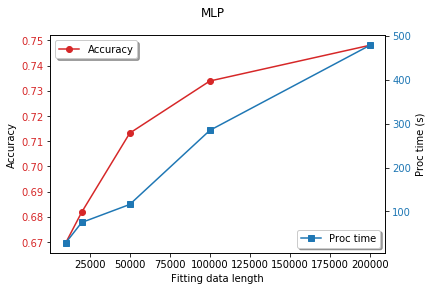

In [190]:
fig, ax = plt.subplots(1,1, figsize=(6,4))
fig.suptitle('MLP')

color1 = 'tab:red'
l1 = ax.plot(train_length, accuracy, 'o-', color=color1)
ax.set_xlabel('Fitting data length')
ax.set_ylabel('Accuracy')
ax.tick_params(axis='y', labelcolor=color1)
ax.legend( l1, ['Accuracy'], loc='upper left', shadow=True)

color2 = 'tab:blue'
ax2 = ax.twinx()
l2 = ax2.plot(train_length, proc_time,'s-', color=color2)
ax2.legend( l2, ['Proc time'], loc='lower right', shadow=True)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylabel('Proc time (s)')

plt.savefig(".\\figs2\\MLP_accu,time_vs_data_length2.png", dpi=300)


In [193]:
# using full training set and testing set

t0 = time.time()
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)
accu= sum(y_test==y_pred) / y_test.shape
t1 = time.time()
print('accuracy = %f, proc_time = %f' % (accu, t1-t0))


accuracy = 0.754761, proc_time = 2727.836644


In [195]:
import pickle

filename = './models/MLP_relu_120,30_iter1000_fulltraining.pkl'
datafile = open(filename,'wb')
pickle.dump(mlp, datafile)
datafile.close()


In [196]:
mlp.score(X_train,y_train)

0.7588428639140277

In [197]:
mlp.score(X_test,y_test)

0.7547608606094434

#####  
##### 8.1.4 What if using only one hidden layer?

In [ ]:

train_length = [10000, 20000, 50000, 100000, 200000]
test_length = 10000

mlp1 = MLPClassifier(hidden_layer_sizes=(120), activation='relu', max_iter=1000, warm_start=False)
accuracy = []
proc_time = []

for train_len in train_length:
    t0 = time.time()
    mlp1.fit(X_train[:train_len],y_train[:train_len])
    y_pred = mlp1.predict(X_test[:test_length])
    accu= sum(y_test[:test_length]==y_pred) / test_length
    t1 = time.time()
    accuracy.append(accu)
    proc_time.append(t1-t0)
    print('accuracy = %f, 
          proc_time = %f' % (accu, t1-t0))
        

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


accuracy = 0.666600, proc_time = 25.986786


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


accuracy = 0.680000, proc_time = 61.732107
accuracy = 0.707900, proc_time = 119.200347


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


accuracy = 0.717100, proc_time = 274.932041


* <b>Accuracy with one hidden layer is slightly worse than that with two hidden layers, and the processing time of one hidden layer is similar to that with two hidden layers.</b>

####  
#### 8.2 pixel discrimination using ANN algorithm from keras

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
import keras

Using TensorFlow backend.


In [17]:
#del model

def relu1 (x): 
    return keras.activations.relu(x, max_value=10.)

model  = Sequential()

# input layer
model.add(Dense(36, activation=relu1, input_shape=(36,)))

# hidden layer
model.add(Dense(120, activation=relu1))

# hidden lyaer (output layer, 15 x and 15 y)
model.add(Dense(30, activation=relu1))

# output layer (pixel index 15 by 15 = 225)
model.add(Dense(225, activation='sigmoid'))


In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#model.compile(loss='mean_absolute_error', optimizer='sgd', metrics=['accuracy'])

In [19]:
y_train1 = np_utils.to_categorical(y_train, 225)
y_test1 = np_utils.to_categorical(y_test, 225)

In [24]:
#train_length = [10000, 20000, 50000, 100000, 200000]
#train_length = [100000]
train_length = [X_train.size]
test_length = 1000

accuracy = []
proc_time = []

for train_len in train_length:
    t0 = time.time()
    model.fit(X_train[:train_len],y_train1[:train_len], batch_size=64,  epochs=1)
    score = model.evaluate(X_test[:test_length], y_test1[:test_length], batch_size=64)
    t1 = time.time()
    accuracy.append(score)
    proc_time.append(t1-t0)
    print('accuracy = %f, proc_time = %f' % (score[1], t1-t0))
    

Epoch 1/1
1000/1000 [==============================] - 0s 20us/step
accuracy = 0.739000, proc_time = 33.394866


In [25]:
t0 = time.time()
score = model.evaluate(X_test, y_test1, batch_size=64)
t1 = time.time()
proc_time.append(t1-t0)
print('accuracy = %f, proc_time = %f' % (score[1], t1-t0))


225747/225747 [==============================] - 3s 14us/step
accuracy = 0.709312, proc_time = 3.234628


* <b>Using default setup of 'ReLU', the loss function could reach 'nan' after certain computations. Therefore, we need to modify the default ReLU function and limit the maxvalue of the ReLU function.</b>


###  
### Conclusion 
***

* <b>Using Sklearn MLP classifier with the optimized parameters obtained through grid search, the model is trained with all the training data set. The accuracy with the full testing data set is 0.754761 after 2727 secconds fo processing time.</b>  
  * Parameters of the MLP model: hidden_layer_sizes=(120,30), activation='relu', max_iter=1000
* <b>Using Keras ANN library, the accuracy is 0.7037 after one epoch.</b>